## Clone the Repository

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1418, done.
remote: Counting objects: 100% (515/515), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 1418 (delta 379), reused 388 (delta 329), pack-reused 903 (from 1)
Receiving objects: 100% (1418/1418), 12.84 MiB | 30.72 MiB/s, done.
Resolving deltas: 100% (961/961), done.


In [1]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [2]:
# Install the Requirements
!pip install -r requirements.txt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Creación del archivo .YAML

In [4]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER/data/train/images'
TRAIN_DIR_LABELS: '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER/data/train/labels'
VALID_DIR_IMAGES: '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER/data/valid/images'
VALID_DIR_LABELS: '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER/data/valid/labels'
TEST_DIR_IMAGES: '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER/data/test/images'
TEST_DIR_LABELS: '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER/data/test/labels'
# Class names.
CLASSES: [
    '__background__',
    'Escombros'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 2

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [ ]:
import os
import xml.etree.ElementTree as ET

def update_xml_labels(directory, old_label, new_label):
    for filename in os.listdir(directory):
        if filename.endswith(".xml"):
            file_path = os.path.join(directory, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()
            for member in root.findall("object"):
                name = member.find("name")
                if name.text == old_label:
                    name.text = new_label
            tree.write(file_path)

# Llamar la función para actualizar tus etiquetas
update_xml_labels("/content/drive/MyDrive/TESIS/ENTRENEMIENTO_FASTER_RCNN_RESNET50/data_grieta/train/labels", "Grieta", "grietas")  # Cambia Grieta a grietas
update_xml_labels("/content/drive/MyDrive/TESIS/ENTRENEMIENTO_FASTER_RCNN_RESNET50/data_grieta/valid/labels", "Grieta", "grietas")


## Training

In [6]:
!python train.py --data data_configs/custom_data.yaml --epochs 400 --model fasterrcnn_resnet50_fpn_v2 --name Escombros2 --batch 8

2024-11-02 18:40:08.171305: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 18:40:08.189342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 18:40:08.210774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 18:40:08.217169: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 18:40:08.232906: I tensorflow/core/platform/cpu_feature_guar

## Visualize Validation Results

In [7]:
import matplotlib.pyplot as plt
import glob as glob

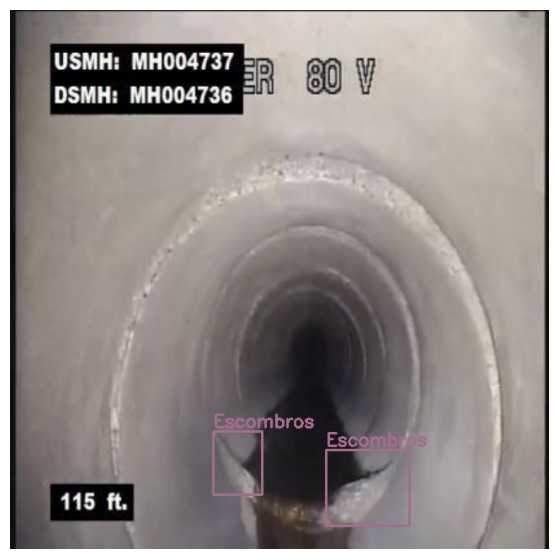

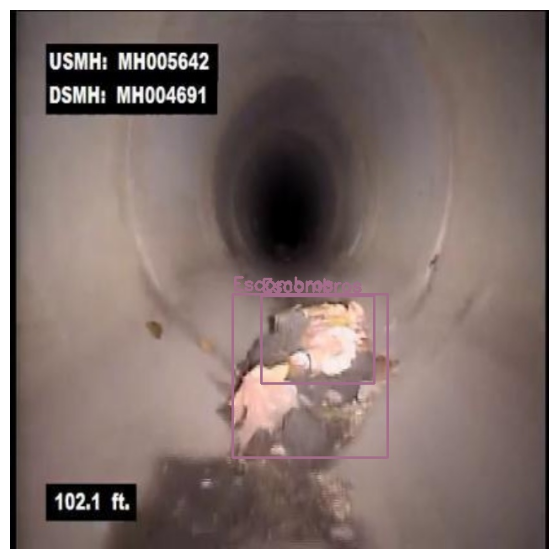

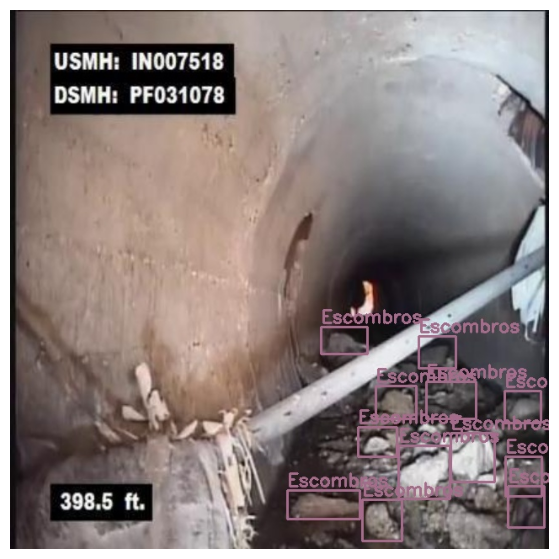

In [8]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/Escombros2'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
!python /content/fastercnn-pytorch-training-pipeline/inference.py \
  -i /content/drive/MyDrive/TESIS/TUBERIASINCRUSTADASFASTER/data/valid/images/DATAEXTRA4TUBERIAINCRUSTADA.jpg \
  -o /content/fastercnn-pytorch-training-pipeline/outputs/inference \
  --data /content/fastercnn-pytorch-training-pipeline/data_configs/custom_data.yaml \
  -m fasterrcnn_resnet50_fpn \
  -w /content/fastercnn-pytorch-training-pipeline/outputs/training/Tuberías_Incrustadas1/best_model.pth \
  -th 0.5 \
  --mpl-show




2024-11-02 01:55:55.941167: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 01:55:55.959012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 01:55:55.980619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 01:55:55.987006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 01:55:56.002796: I tensorflow/core/platform/cpu_feature_guar

In [10]:
!python /content/fastercnn-pytorch-training-pipeline/inference.py \
  --weights /content/fastercnn-pytorch-training-pipeline/outputs/training/Escombros2/best_model.pth \
  --input /content/drive/MyDrive/TESIS/ESCOMBROS_FASTER/data/test/images\
  --mpl-show




2024-11-02 19:21:14.215794: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 19:21:14.234323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 19:21:14.255199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 19:21:14.261536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 19:21:14.276699: I tensorflow/core/platform/cpu_feature_guar

In [11]:
!scp -r /content/fastercnn-pytorch-training-pipeline/outputs/inference '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER'

In [9]:
!scp -r /content/fastercnn-pytorch-training-pipeline/outputs/training/Escombros2 '/content/drive/MyDrive/TESIS/ESCOMBROS_FASTER'

Check Out the Repo for Latest Updates
https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

In [12]:
# No verbose mAP.
!python eval.py --weights /content/fastercnn-pytorch-training-pipeline/outputs/training/Escombros2/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2024-11-02 19:22:53.861563: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 19:22:53.879322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 19:22:53.900328: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 19:22:53.906675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 19:22:53.921761: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2023-07-06 01:42:38.843655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 01:42:39.900126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 127/127 [00:00<00:00, 285924.11it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 16/1